In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
nan_rate = []
for col in df.columns:
   #print(round(df[col].isna().sum()/df.shape[0]*100, 2), "%")
    nan_rate.append([col,round(df[col].isna().sum()/df.shape[0]*100, 1) ])
print(pd.DataFrame(nan_rate))

                0     1
0            Date   0.0
1        Location   0.0
2         MinTemp   1.0
3         MaxTemp   0.9
4        Rainfall   2.2
5     Evaporation  43.2
6        Sunshine  48.0
7     WindGustDir   7.1
8   WindGustSpeed   7.1
9      WindDir9am   7.3
10     WindDir3pm   2.9
11   WindSpeed9am   1.2
12   WindSpeed3pm   2.1
13    Humidity9am   1.8
14    Humidity3pm   3.1
15    Pressure9am  10.4
16    Pressure3pm  10.3
17       Cloud9am  38.4
18       Cloud3pm  40.8
19        Temp9am   1.2
20        Temp3pm   2.5
21      RainToday   2.2
22   RainTomorrow   2.2


In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df_num = df.select_dtypes(float)
df_num.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
## On teste de supprimer tous les nan pour voir. On stocke ça dans df_new
df_new = df.dropna()
df_new.info()
# On enlève environ 2/3 du tableau, ce qui fait beaucoup.

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

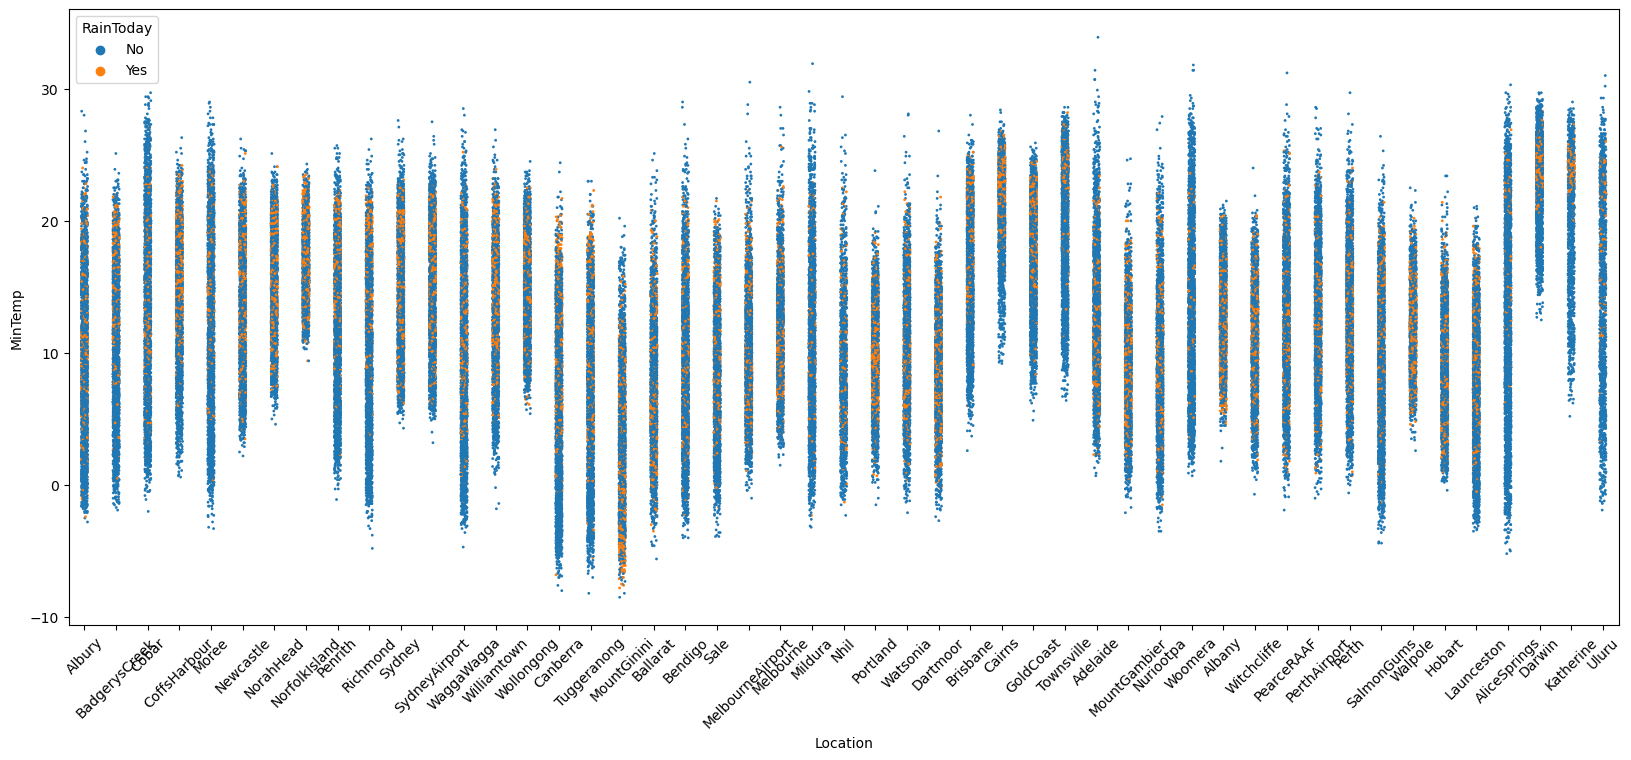

In [7]:
plt.figure(figsize=(20, 8))
sns.stripplot(y = df['MinTemp'], x = df['Location'], hue = df['RainToday'], size = 2)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

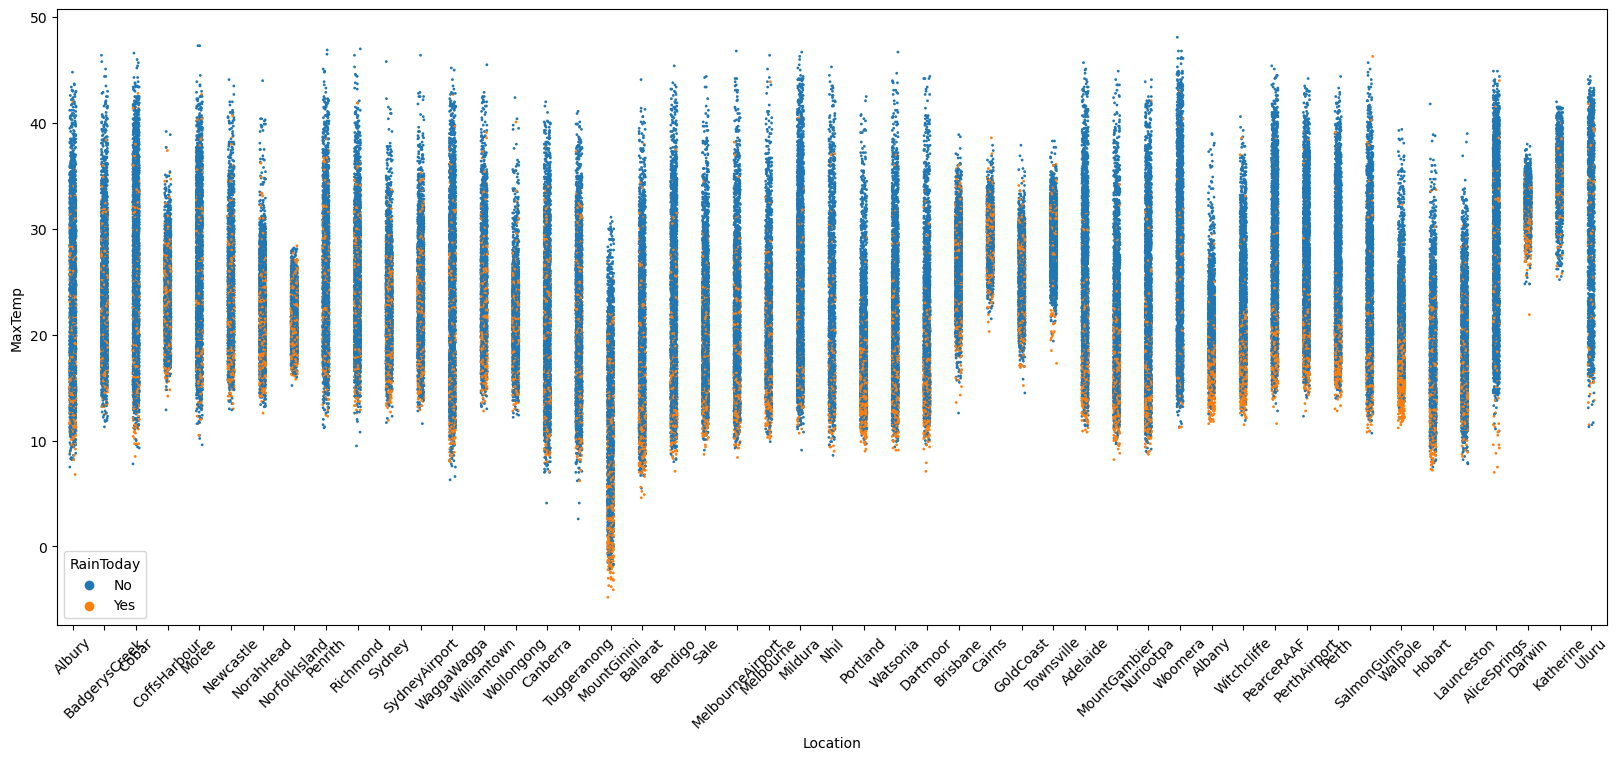

In [8]:
plt.figure(figsize=(20, 8))
sns.stripplot(y = df['MaxTemp'], x = df['Location'], hue = df['RainToday'], size = 2)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

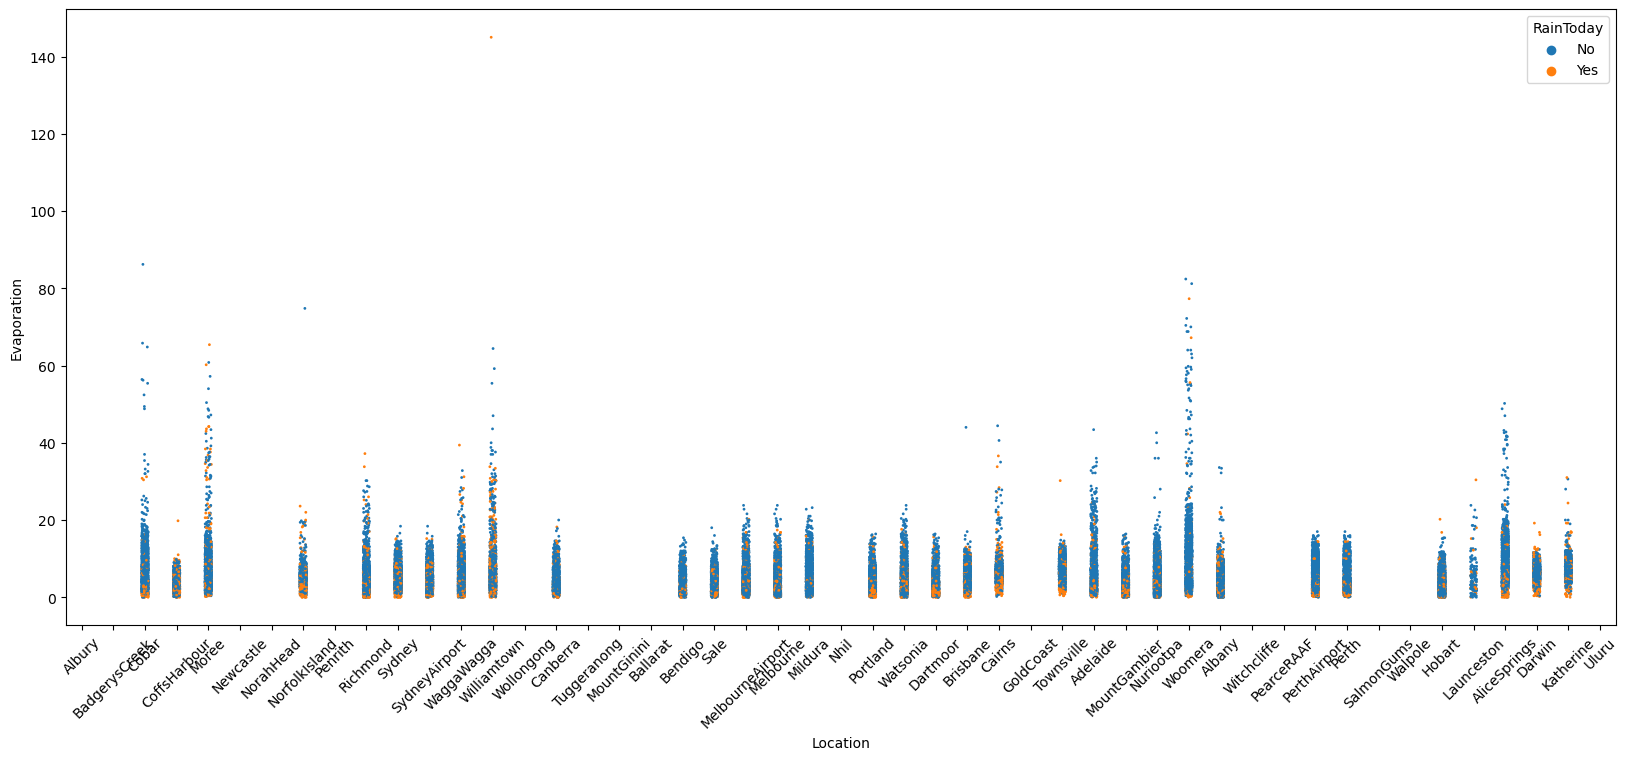

In [9]:
plt.figure(figsize=(20, 8))
sns.stripplot(y = df['Evaporation'], x = df['Location'], hue = df['RainToday'], size = 2)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

# OC : valeurs extrêmes pour NorahHead et WaggaWagga ?

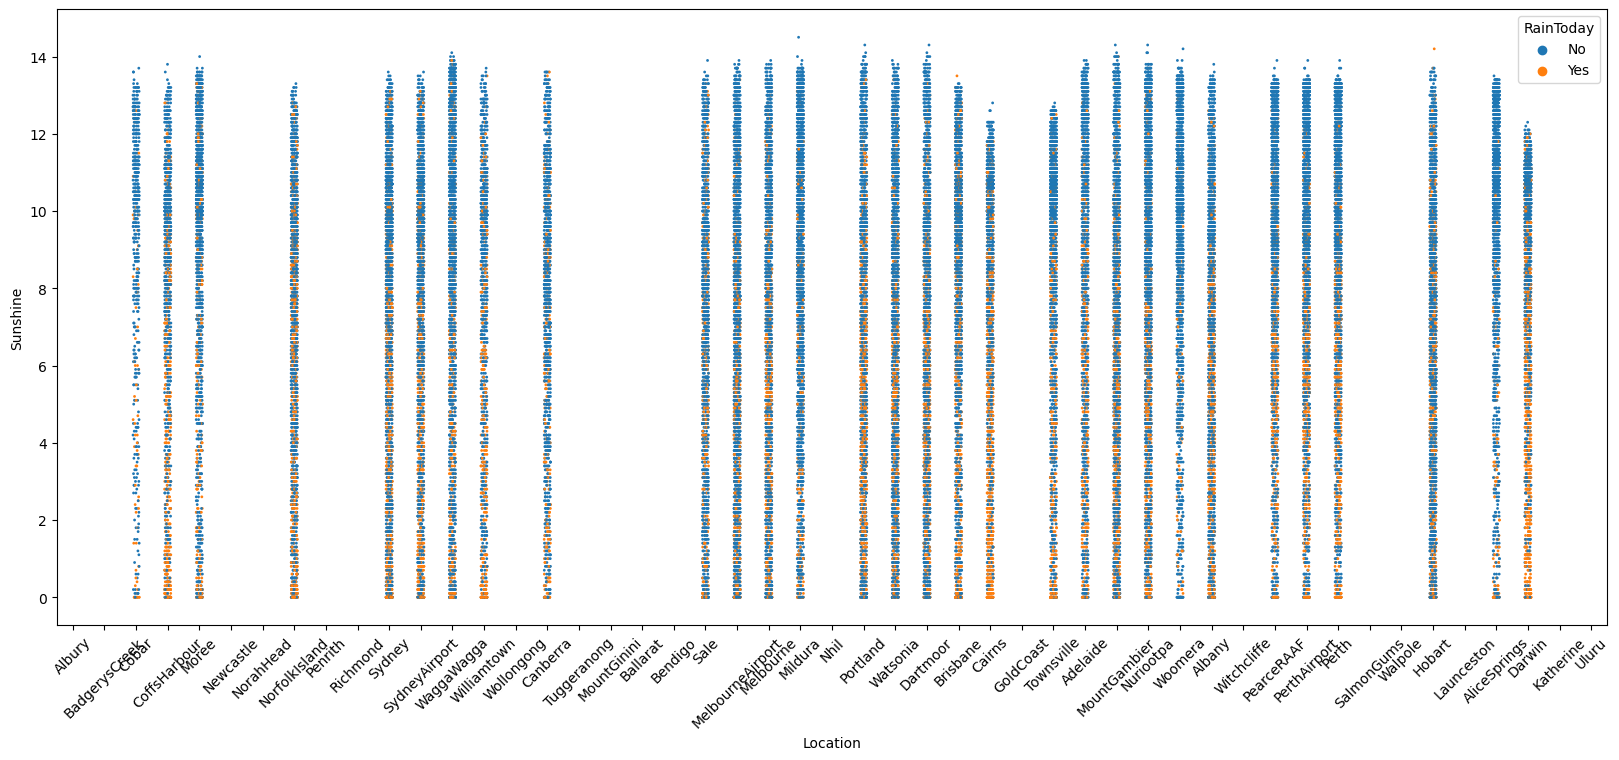

In [10]:
plt.figure(figsize=(20, 8))
sns.stripplot(y = df['Sunshine'], x = df['Location'], hue = df['RainToday'], size = 2)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

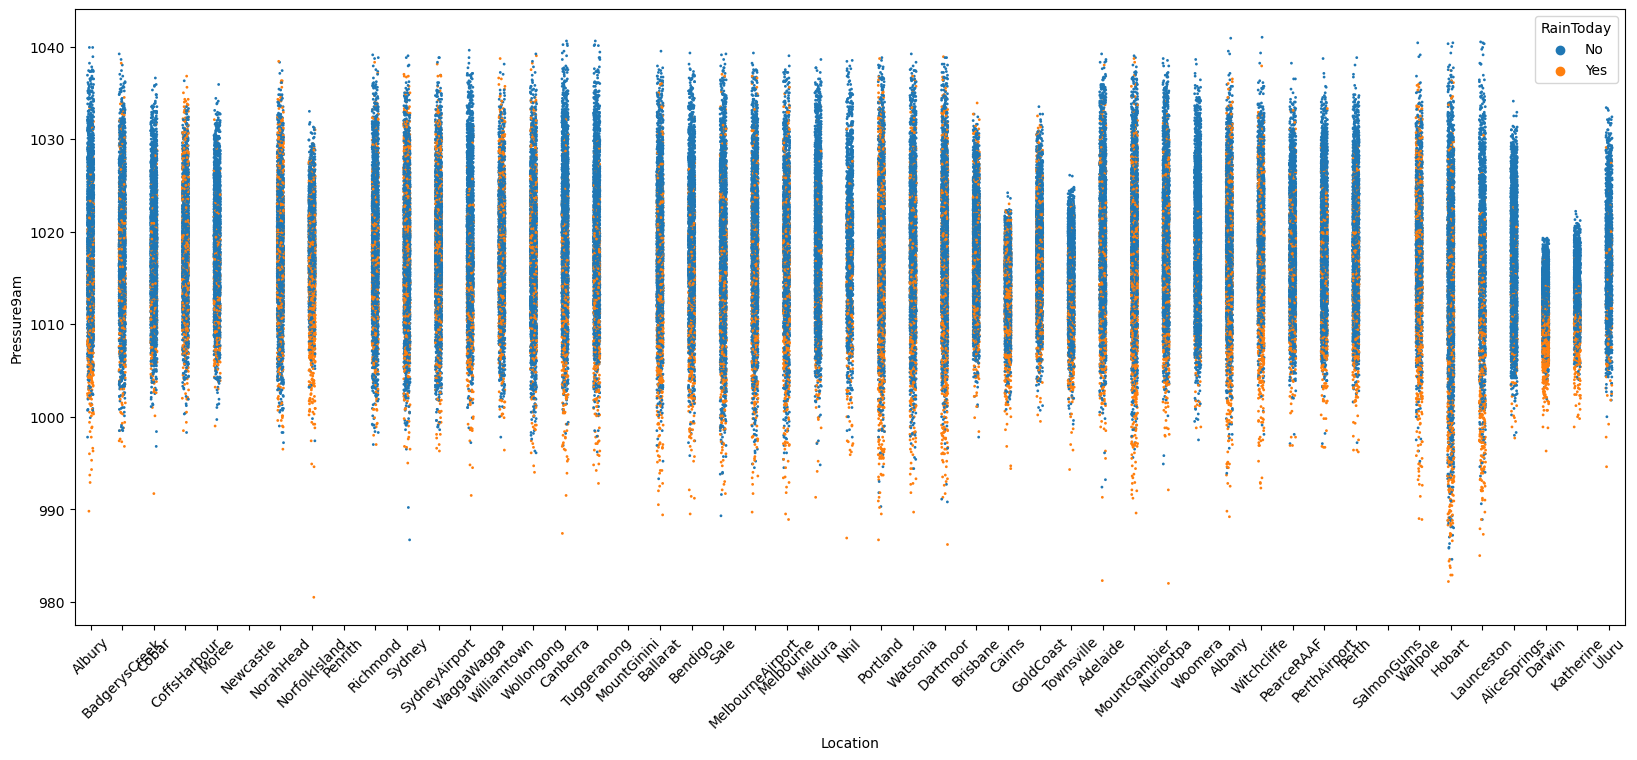

In [11]:
plt.figure(figsize=(20, 8))
sns.stripplot(y = df['Pressure9am'], x = df['Location'], hue = df['RainToday'], size = 2)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

# OC : valeur extrême pour NorahHead ?

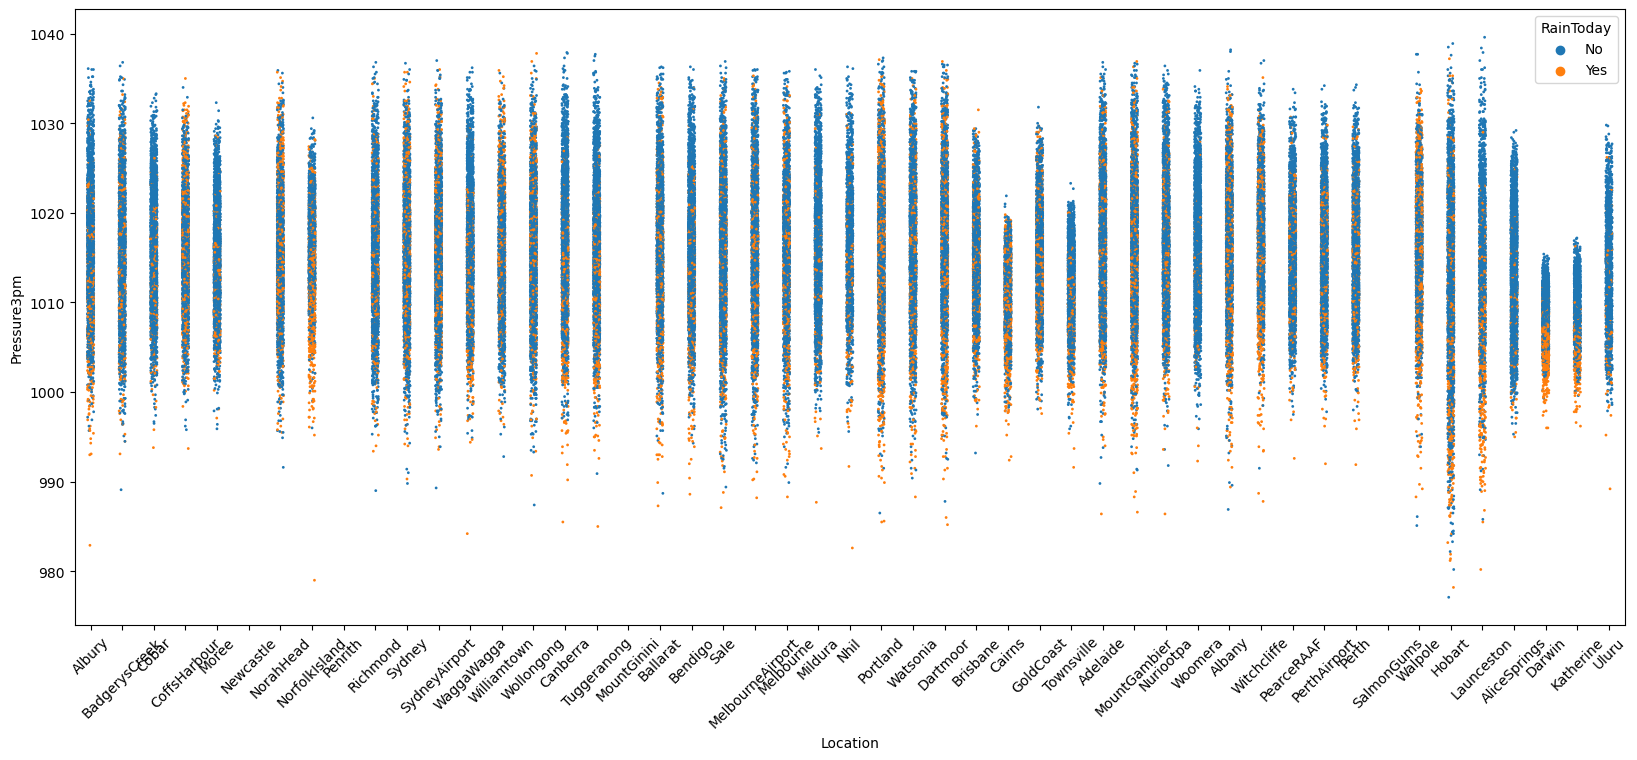

In [12]:
plt.figure(figsize=(20, 8))
sns.stripplot(y = df['Pressure3pm'], x = df['Location'], hue = df['RainToday'], size = 2)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

# OC : valeur extrême pour NorahHead ?

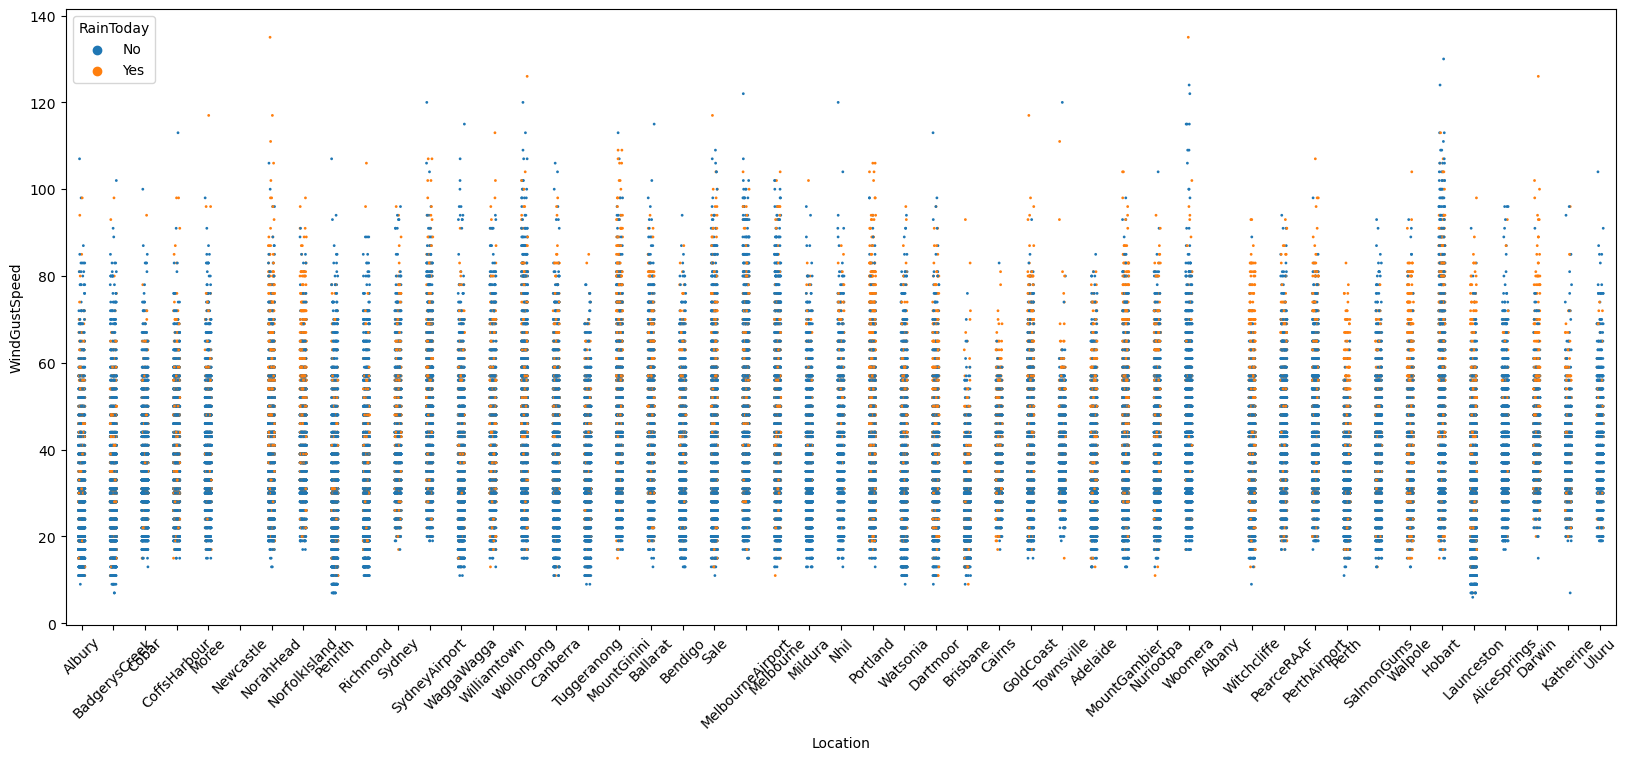

In [13]:
plt.figure(figsize=(20, 8))
sns.stripplot(y = df['WindGustSpeed'], x = df['Location'], hue = df['RainToday'], size = 2)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

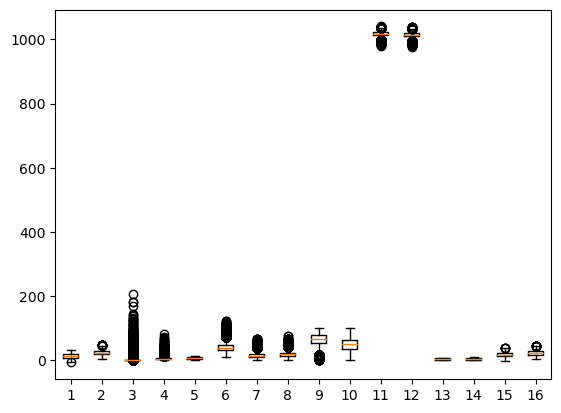

In [14]:
df_num = df.select_dtypes(float).copy().dropna() # faut dropna pour visualiser le box plot, sinon ça marche pas.
plt.boxplot([df_num[col] for col in df_num.columns]) # matplotlib permet d'afficher des boxplot par compréhension de liste. Mais l'étiquette de l'axe des x n'est pas automatique.
plt.xticks()
plt.show()
# Les échelles des variables sont très différentes, ce qui rend ce graphique peu lisible.

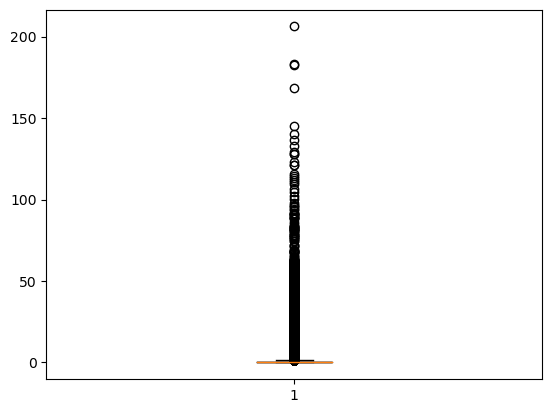

In [15]:
plt.boxplot(df_num['Rainfall']) 

plt.show()

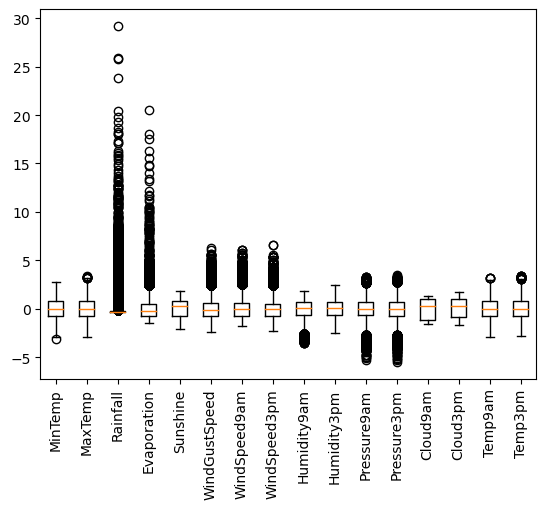

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num))

plt.boxplot([df_num_scaled[col] for col in df_num_scaled.columns]) 
plt.xticks(np.arange(1, 17), df_num.columns)
plt.xticks(rotation = 90)
plt.show()
# C'est plus clair, mais il manque encore l'étiquette des abscisses.

In [17]:
df_num.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6
